https://www.kaggle.com/imakash3011/customer-personality-analysis

**Content**

Attributes

People

ID: Customer's unique identifier \
Year_Birth: Customer's birth year \
Education: Customer's education level \
Marital_Status: Customer's marital status \
Income: Customer's yearly household income \
Kidhome: Number of children in customer's household \
Teenhome: Number of teenagers in customer's household \
Dt_Customer: Date of customer's enrollment with the company \
Recency: Number of days since customer's last purchase \
Complain: 1 if customer complained in the last 2 years, 0 otherwise 

Products

MntWines: Amount spent on wine in last 2 years \
MntFruits: Amount spent on fruits in last 2 years \
MntMeatProducts: Amount spent on meat in last 2 years \
MntFishProducts: Amount spent on fish in last 2 years \
MntSweetProducts: Amount spent on sweets in last 2 years \
MntGoldProds: Amount spent on gold in last 2 years 

Promotion

NumDealsPurchases: Number of purchases made with a discount \
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise \
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise \
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise \
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise \
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise \
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise 

Place

NumWebPurchases: Number of purchases made through the company’s web site \
NumCatalogPurchases: Number of purchases made using a catalogue \
NumStorePurchases: Number of purchases made directly in stores \
NumWebVisitsMonth: Number of visits to company’s web site in the last month 

**Target**\
Need to perform clustering to summarize customer segments.

### Import relevant packages and data

In [1486]:
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1487]:
sns.set()

In [1488]:
df = pd.read_csv('marketing_campaign.csv', '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [1489]:
df.shape

(2240, 29)

In [1490]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [1491]:
df.describe(include=object)

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [1493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data cleaning and preprocessing

Missing Income, Dt_Customer not a datetime object. \
There are categorical features present and hence, need to be numerically encoded later on

In [1494]:
# Only 24 rows of income missing and hence, best to drop all null values rather than the income column
df.dropna(inplace=True)

In [1495]:
# Convert Dt_Customer to date-time
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [1496]:
max(df['Dt_Customer'])

Timestamp('2014-12-06 00:00:00')

In [1497]:
(max(df['Dt_Customer']) - min(df['Dt_Customer']))

Timedelta('1063 days 00:00:00')

In [1498]:
df['Customer_days'] = max(df['Dt_Customer']) - df['Dt_Customer']

In [1499]:
day_list = []
for i in df['Customer_days']:
    day_list.append(i.days)

In [1500]:
df['Customer_days'] = day_list

In [1501]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,125
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,472
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,65
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,321


In [1502]:
df.duplicated().sum()

0

In [1503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [1504]:
df.select_dtypes(object).columns

Index(['Education', 'Marital_Status'], dtype='object')

In [1505]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [1506]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

### Feature Engineering

In [1507]:
## Total spent per customer
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntGoldProds'] + \
                    df['MntSweetProducts']

In [1508]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [1509]:
df["Is_Parent"] = np.where(df.Total_Children> 0, 1, 0)

In [1510]:
df['Relationship'] = df['Marital_Status'].replace({'Divorced': 'Alone', 'Widow': 'Alone', 'Single': 'Alone', 'Absurd': 
                                                    'Alone', 'YOLO': 'Alone'})

In [1511]:
# Extract Age from Year of Birth
df['Age'] = 2021 - df['Year_Birth']
df['Age'].head()

0    64
1    67
2    56
3    37
4    40
Name: Age, dtype: int64

In [1512]:
# For marital status, create another column that categorizes either Alone, Partner, Married

Copy the data before making main changes

In [1513]:
org_data = df.copy()

In [1514]:
original_data = df.copy()

In [1515]:
original_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_days', 'Total_Spent', 'Total_Children', 'Is_Parent',
       'Relationship', 'Age'],
      dtype='object')

In [1516]:
original_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_days,Total_Spent,Total_Children,Is_Parent,Relationship,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,971,1617,0,0,Alone,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,125,27,2,1,Alone,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,472,776,0,0,Together,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,65,53,1,1,Together,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,321,422,1,1,Married,40


In [1517]:
df['Relationship'].value_counts()

Married     857
Alone       786
Together    573
Name: Relationship, dtype: int64

#### Segmenting educaiton levels from basic to university to postgraduate

In [1518]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [1519]:
df['Education'] = df['Education'].replace({'Basic': 'High School', "2n Cycle": "Undergraduate", "Graduation": "Graduate",
                                          'Master': 'Postgraduate', 'PhD': 'Postgraduate'})
df['Education'].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     200
High School        54
Name: Education, dtype: int64

In [1520]:
## Total spent per customer
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntGoldProds'] + \
                    df['MntSweetProducts']

In [1521]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_days', 'Total_Spent', 'Total_Children', 'Is_Parent',
       'Relationship', 'Age'],
      dtype='object')

In [1522]:
df[['Z_CostContact', 'Z_Revenue']].describe()

,Z_CostContact,Z_Revenue
count,2216.0,2216.0
mean,3.0,11.0
std,0.0,0.0
min,3.0,11.0
25%,3.0,11.0
50%,3.0,11.0
75%,3.0,11.0
max,3.0,11.0


In [1523]:
## Remove all redundant columns
df.drop(columns=['Year_Birth', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True)

In [1524]:
df.describe()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_days,Total_Spent,Total_Children,Is_Parent,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,...,0.073105,0.064079,0.013538,0.009477,0.150271,512.006318,607.075361,0.947202,0.714350,52.179603
std,3249.376275,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,...,0.260367,0.244950,0.115588,0.096907,0.357417,232.469034,602.900476,0.749062,0.451825,11.985554
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,25.000000
25%,2814.750000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,340.000000,69.000000,0.000000,0.000000,44.000000
50%,5458.500000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,513.000000,396.500000,1.000000,1.000000,51.000000
75%,8421.750000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,686.000000,1048.000000,1.000000,1.000000,62.000000
max,11191.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1063.000000,2525.000000,3.000000,1.000000,128.000000


In [1525]:
df[['Age', 'Total_Children', 'Total_Spent', 'Customer_days', 'Income']]

,Age,Total_Children,Total_Spent,Customer_days,Income
0,64,0,1617,971,58138.0
1,67,2,27,125,46344.0
2,56,0,776,472,71613.0
3,37,1,53,65,26646.0
4,40,1,422,321,58293.0
...,...,...,...,...,...
2235,54,1,1341,541,61223.0
2236,75,3,444,61,64014.0
2237,40,0,1241,315,56981.0
2238,65,1,843,316,69245.0


<AxesSubplot:xlabel='Relationship', ylabel='Income'>

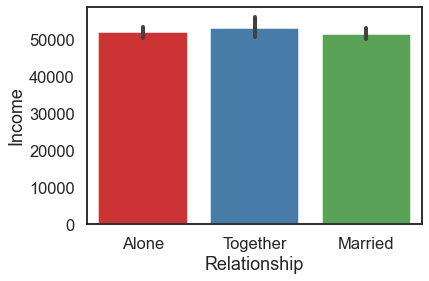

In [1665]:
sns.barplot(data=org_data[['Relationship', 'Income']], x='Relationship', y='Income', palette='Set1')

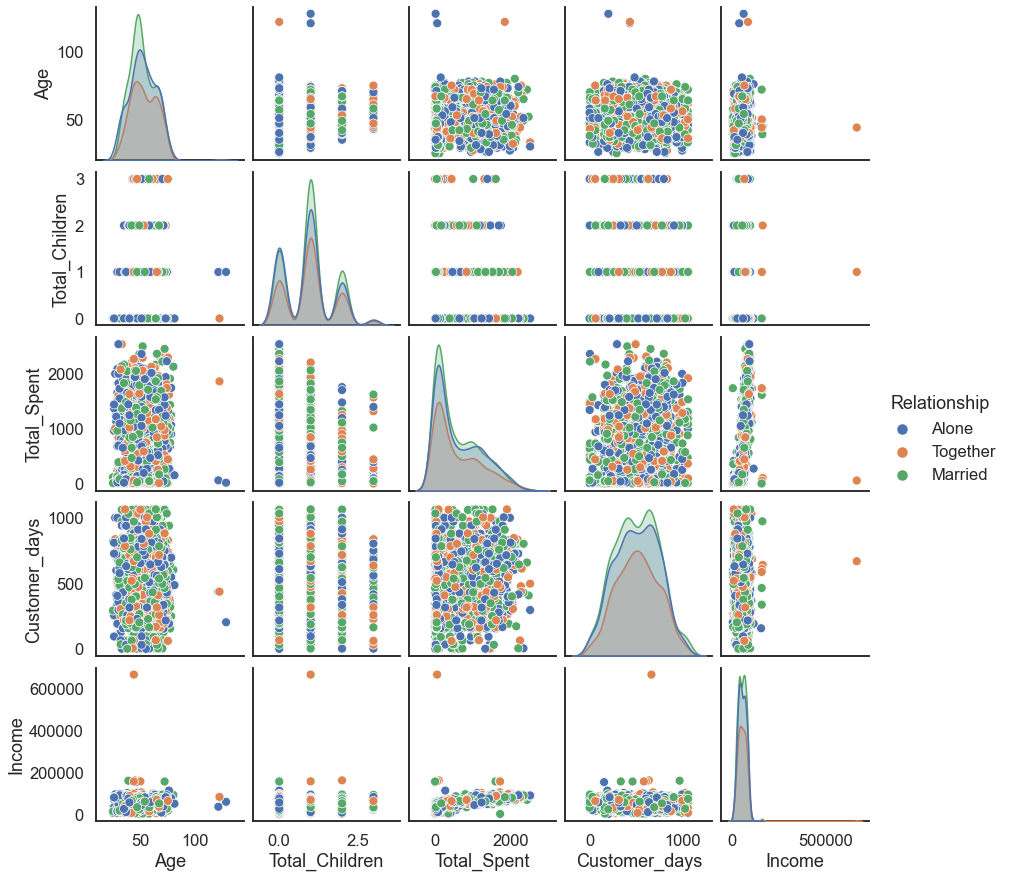

In [1526]:
sns.set_context('talk')
sns.set_style('white')
sns.pairplot(df[['Age', 'Total_Children', 'Total_Spent', 'Customer_days', 'Income', 'Relationship']], hue='Relationship')

In [1527]:
# Looking at the pairplot, there seem to be some outliers in the features we engineered and hence, will be removing these

In [1528]:
# Removing all outliers from the data
# Most of the code is copied from Sharma (2018) 
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# The first step is to find the z-score (number of standard deviations above or below the mean), take the absolute value
# and wherever the values of z are less than 3 standard deviations, only keep these in the dataframe
# The precaution taken is getting only the numeric data where the coding information is taken from Overmeire (2012)
# https://stackoverflow.com/questions/12725417/drop-non-numeric-columns-from-a-pandas-dataframe
from scipy import stats
z = np.abs(stats.zscore(df.select_dtypes(exclude = ['object'])))
df = df[(z < 4).all(axis=1)]

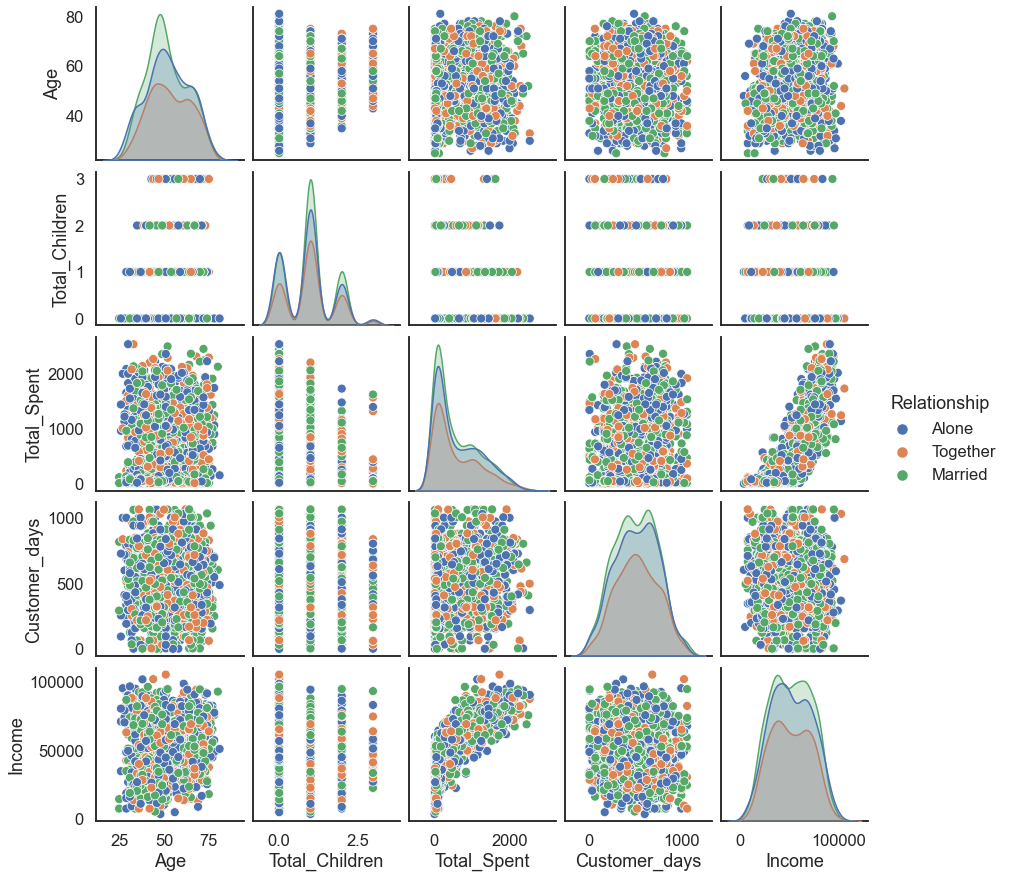

In [1529]:
sns.set_context('talk')
sns.set_style('white')
sns.pairplot(df[['Age', 'Total_Children', 'Total_Spent', 'Customer_days', 'Income', 'Relationship']], hue='Relationship')

In [1530]:
df.columns

Index(['ID', 'Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_days', 'Total_Spent',
       'Total_Children', 'Is_Parent', 'Relationship', 'Age'],
      dtype='object')

In [1531]:
y = []
for val in original_data['ID']:
    if val not in list(df['ID']):
        y.append(val)

In [1538]:
len(y)

107

In [1532]:
df.shape

(2109, 28)

In [1533]:
original_data.shape

(2216, 35)

In [1534]:
original_data = org_data.copy()

In [1535]:
org_data.shape

(2216, 35)

In [1536]:
2216 - 2109

107

In [1537]:
original_data[original_data['ID'] == 8475]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_days,Total_Spent,Total_Children,Is_Parent,Relationship,Age
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,...,0,3,11,0,337,1608,1,1,Married,48


In [1539]:
for val in y:
    original_data.drop(original_data[original_data['ID'] == val].index, inplace=True)

In [1540]:
original_data.shape

(2109, 35)

In [1541]:
df.shape

(2109, 28)

Now the original data has been gotten rid of outliers

In [1542]:
# original_data = org_data_2.copy()

In [1543]:
# The correlation matrix
corr_mat = df.drop(columns=['AcceptedCmp2', 'Complain']).corr()

<AxesSubplot:>

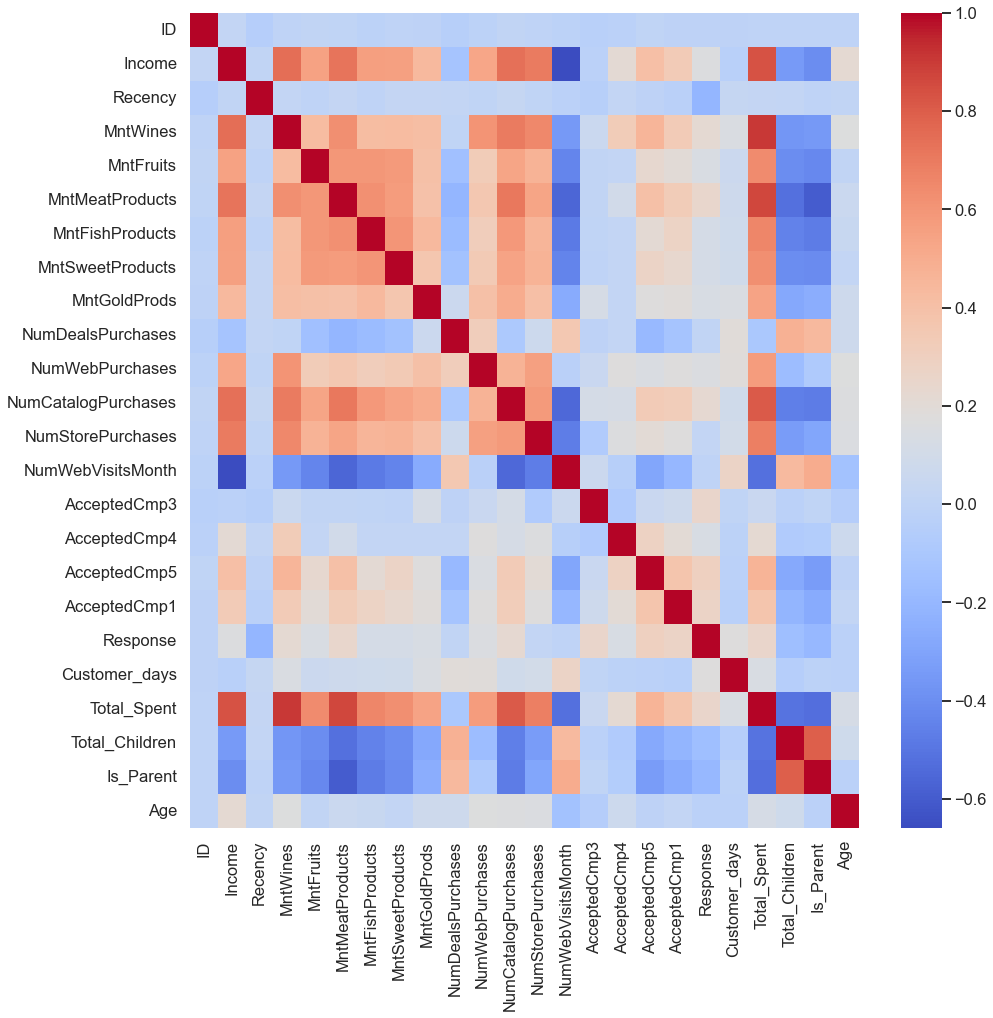

In [1544]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, cmap='coolwarm')

In [1545]:
# Pairwise maximal correlations
for x in range(len(corr_mat.columns)):
    corr_mat.iloc[x,x] = 0.0

In [1546]:
# Pairwise maximal correlations
corr_mat.abs().idxmax().sort_values(ascending=False)

MntWines                     Total_Spent
MntFruits                    Total_Spent
MntMeatProducts              Total_Spent
MntFishProducts              Total_Spent
MntSweetProducts             Total_Spent
MntGoldProds                 Total_Spent
AcceptedCmp5                 Total_Spent
NumCatalogPurchases          Total_Spent
Income                       Total_Spent
NumDealsPurchases         Total_Children
Is_Parent                 Total_Children
Recency                         Response
AcceptedCmp3                    Response
ID                               Recency
Customer_days          NumWebVisitsMonth
NumWebPurchases                 MntWines
AcceptedCmp4                    MntWines
Total_Spent                     MntWines
Total_Children                 Is_Parent
NumStorePurchases                 Income
NumWebVisitsMonth                 Income
Age                               Income
Response                    AcceptedCmp5
AcceptedCmp1                AcceptedCmp5
dtype: object

In [1547]:
df.head()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_days,Total_Spent,Total_Children,Is_Parent,Relationship,Age
0,5524,Graduate,58138.0,58,635,88,546,172,88,88,...,0,0,0,1,971,1617,0,0,Alone,64
1,2174,Graduate,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,125,27,2,1,Alone,67
2,4141,Graduate,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,472,776,0,0,Together,56
3,6182,Graduate,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,65,53,1,1,Together,37
4,5324,Postgraduate,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,321,422,1,1,Married,40


### Encoding categorical and scaling

In [1548]:
df.columns[df.dtypes == object]

Index(['Education', 'Relationship'], dtype='object')

In [1549]:
df = pd.get_dummies(df, columns=['Education', 'Relationship'])
print("All columns are numerical")

All columns are numerical


In [1550]:
df.columns

Index(['ID', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Customer_days', 'Total_Spent',
       'Total_Children', 'Is_Parent', 'Age', 'Education_Graduate',
       'Education_High School', 'Education_Postgraduate',
       'Education_Undergraduate', 'Relationship_Alone', 'Relationship_Married',
       'Relationship_Together'],
      dtype='object')

In [1551]:
df.drop(columns=['ID'], inplace=True)

In [1552]:
skew_columns = (df
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.8]
skew_columns

Education_High School      6.011092
AcceptedCmp1               3.735619
AcceptedCmp4               3.532900
AcceptedCmp5               3.470767
AcceptedCmp3               3.325618
Education_Undergraduate    2.916891
MntFruits                  2.061627
MntSweetProducts           2.051293
Response                   2.033236
MntFishProducts            1.911286
MntGoldProds               1.824440
MntMeatProducts            1.743663
NumDealsPurchases          1.574224
MntWines                   1.166344
NumCatalogPurchases        1.153056
Relationship_Together      1.124424
Total_Spent                0.916216
dtype: float64

Columns to scale: Apart from Cmp1, Cmp2, Cmp4, Cmp5, Cmp3, Education, Response, Relationship, Complain

In [1553]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    df[col] = np.log1p(df[col])

In [1554]:
# Scale the columns
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [1555]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [1556]:
df_scaled

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Total_Children,Is_Parent,Age,Education_Graduate,Education_High School,Education_Postgraduate,Education_Undergraduate,Relationship_Alone,Relationship_Married,Relationship_Together
0,0.339086,0.306333,1.002611,1.451617,1.419508,1.595532,1.437373,1.082582,0.701106,1.515787,...,-1.280437,-1.608333,1.025252,0.992913,-0.162103,-0.788074,-0.310087,1.347499,-0.799184,-0.585198
1,-0.239833,-0.386711,-1.204836,-0.988407,-1.394274,-0.871064,-0.974675,-0.906980,0.052194,-1.166087,...,1.407907,0.621762,1.282398,0.992913,-0.162103,-0.788074,-0.310087,1.347499,-0.799184,-0.585198
2,1.000519,-0.802538,0.781096,1.080927,0.481857,1.331033,0.549197,0.513398,-0.862395,1.515787,...,-1.280437,-1.608333,0.339529,0.992913,-0.162103,-0.788074,-0.310087,-0.742115,-0.799184,1.708823
3,-1.206727,-0.802538,-1.204836,-0.399347,-0.685033,-0.080667,-0.534178,-1.027595,0.052194,-0.782963,...,0.063735,0.621762,-1.289064,0.992913,-0.162103,-0.788074,-0.310087,-0.742115,-0.799184,1.708823
4,0.346694,1.553812,0.281967,0.998746,0.434790,0.802786,0.702456,-0.260143,1.615695,0.366412,...,0.063735,0.621762,-1.031918,-1.007138,-0.162103,1.268916,-0.310087,-0.742115,1.251277,-0.585198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,0.490516,-0.109494,1.063807,0.998746,0.712623,0.748676,1.621979,1.884433,0.052194,1.898911,...,0.063735,0.621762,0.168098,0.992913,-0.162103,-0.788074,-0.310087,-0.742115,1.251277,-0.585198
2105,0.627515,0.237028,0.754425,-1.434014,-0.433602,-1.539387,-1.415173,-0.710338,2.264607,1.515787,...,2.752079,0.621762,1.968122,-1.007138,-0.162103,1.268916,-0.310087,-0.742115,-0.799184,1.708823
2106,0.282294,1.449856,1.201182,1.067939,0.825605,0.587655,0.214863,0.089055,-0.862395,-0.782963,...,-1.280437,-1.608333,-1.031918,0.992913,-0.162103,-0.788074,-0.310087,1.347499,-0.799184,-0.585198
2107,0.884283,-1.426278,0.783695,0.773610,0.816659,1.133903,0.767140,0.799724,0.052194,0.749537,...,0.063735,0.621762,1.110968,-1.007138,-0.162103,1.268916,-0.310087,-0.742115,-0.799184,1.708823


### Dimensionality Reduction

In [1686]:
df_scaled.shape

(2109, 32)

In [1685]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 30):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df_scaled)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.29376
2,PCA(n_components=2),0.37789
3,PCA(n_components=3),0.447774
4,PCA(n_components=4),0.504656
5,PCA(n_components=5),0.558061
6,PCA(n_components=6),0.608683
7,PCA(n_components=7),0.654783
8,PCA(n_components=8),0.692605
9,PCA(n_components=9),0.729638


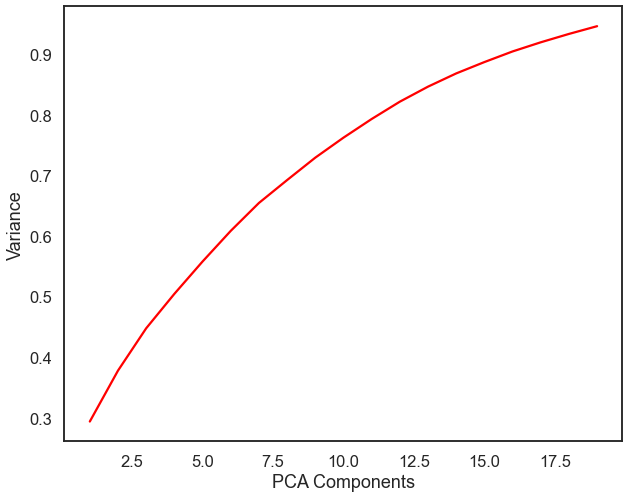

In [1680]:
plt.figure(figsize=(10,8))
sns.lineplot(x='n', y='var', data=pca_df, color='red')
plt.xlabel('PCA Components')
plt.ylabel('Variance')
plt.show()

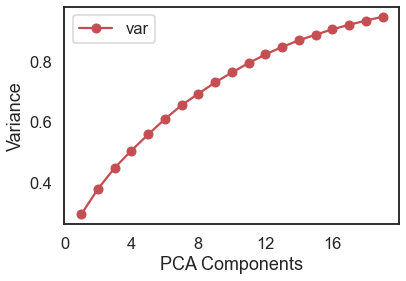

In [1681]:
ax = pca_df.plot(marker='o',ls='-', color='r')
ax.set_xticks(range(0,20, 4))
ax.set_xlim(0,20)
ax.set(xlabel='PCA Components', ylabel='Variance');

In [1560]:
PCAmod = PCA(n_components=12)
PCAmod.fit(df_scaled)
PCA_df = pd.DataFrame(PCAmod.transform(df_scaled))

In [1561]:
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.051742,0.464821,-1.976356,2.772685,-0.611331,-0.280312,-0.343230,0.114956,-1.067385,-0.570191,-1.640547,1.462697
1,-3.397967,-0.504556,0.017481,-0.137305,-1.561232,2.186123,-0.984990,0.481688,0.907649,-0.102591,0.912074,1.114466
2,3.120906,-0.841053,-1.026812,-1.109246,-1.057745,-0.075909,1.532664,0.826424,-0.359652,-1.108574,-0.106520,0.057527
3,-2.911717,-1.195201,-0.868312,-0.937380,-0.652858,0.839705,1.642229,0.751682,0.592288,-0.689756,0.781872,-1.551051
4,0.867036,1.271317,0.339259,-1.335957,0.815915,-1.181267,-1.095864,-0.300830,-0.282798,1.244229,0.219247,-1.556931
...,...,...,...,...,...,...,...,...,...,...,...,...
2104,2.558354,1.170267,-2.031961,-0.866730,1.182222,0.117801,-0.620265,0.477295,-0.170817,-0.062578,0.271417,0.100920
2105,-1.104124,3.636332,2.783798,-0.654493,-0.291780,1.632851,2.143330,-0.101721,1.265797,0.944792,1.842167,1.031419
2106,2.745946,-1.244159,-0.254175,0.171464,-1.085730,1.704647,-0.721121,-2.731748,-0.817084,0.428354,0.000031,-1.157111
2107,2.643127,1.292458,1.142044,-1.356022,-1.351969,-0.987560,1.134435,1.382930,0.441191,-1.081084,1.204509,-0.072706


## Clustering

### K-Means

In [1562]:
from sklearn.cluster import KMeans
km_list = list()

for clust in range(1,7):
    km = KMeans(n_clusters=clust, random_state=42, max_iter=10000)
    km = km.fit(PCA_df)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

C:\Users\areeb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [1563]:
pd.concat(km_list, axis=1).T

,clusters,inertia,model
0,1,52015.018059,"KMeans(max_iter=10000, n_clusters=1, random_st..."
1,2,37607.254791,"KMeans(max_iter=10000, n_clusters=2, random_st..."
2,3,33131.102758,"KMeans(max_iter=10000, n_clusters=3, random_st..."
3,4,31340.603176,"KMeans(max_iter=10000, n_clusters=4, random_st..."
4,5,29394.114126,"KMeans(max_iter=10000, n_clusters=5, random_st..."
5,6,27915.253597,"KMeans(max_iter=10000, n_clusters=6, random_st..."


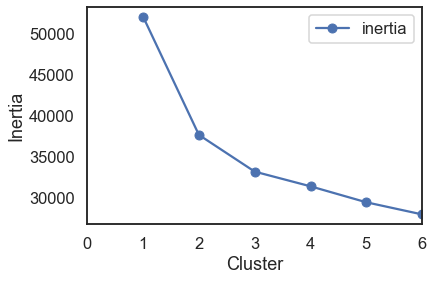

In [1564]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,10))
ax.set_xlim(0,6)
ax.set(xlabel='Cluster', ylabel='Inertia');

After 3 clusters, the rate of decrease (gradient) appears to be the same so 3 seems a good choice

In [1565]:
km = KMeans(n_clusters=3, random_state=4, max_iter=10000)
km = km.fit(PCA_df)

In [1566]:
PCA_df['Clusters'] =  km.fit_predict(PCA_df)

In [1567]:
PCA_df['Clusters'].value_counts()

1    877
2    730
0    502
Name: Clusters, dtype: int64

### Hierarchical Clustering

In [1568]:
from sklearn.cluster import AgglomerativeClustering

In [1569]:
PCA_df.drop(columns=['Clusters'], inplace=True)

In [1570]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=True)
ag = ag.fit(PCA_df)

In [1571]:
PCA_df['Clusters'] =  ag.fit_predict(PCA_df)

In [1572]:
PCA_df['Clusters'].value_counts()

0    842
1    764
2    503
Name: Clusters, dtype: int64

In [1573]:
ag.labels_

array([2, 1, 2, ..., 0, 0, 0], dtype=int64)

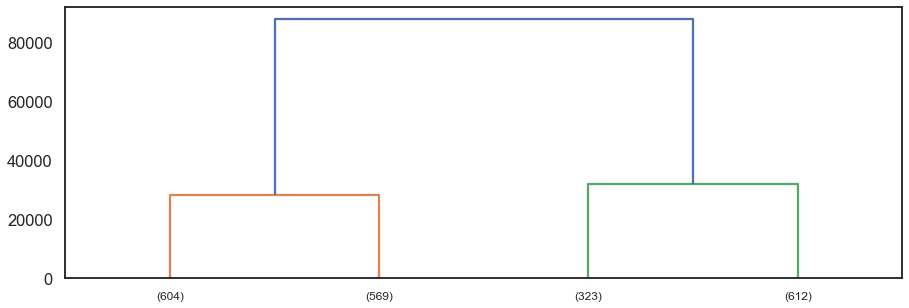

In [1574]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


den = hierarchy.dendrogram(Z, orientation='top', 
                           p=1, truncate_mode='level',
                           show_leaf_counts=True, ax=ax)
### END SOLUTION

### Mean Shift

In [1575]:
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,Clusters
0,4.051742,0.464821,-1.976356,2.772685,-0.611331,-0.280312,-0.343230,0.114956,-1.067385,-0.570191,-1.640547,1.462697,2
1,-3.397967,-0.504556,0.017481,-0.137305,-1.561232,2.186123,-0.984990,0.481688,0.907649,-0.102591,0.912074,1.114466,1
2,3.120906,-0.841053,-1.026812,-1.109246,-1.057745,-0.075909,1.532664,0.826424,-0.359652,-1.108574,-0.106520,0.057527,2
3,-2.911717,-1.195201,-0.868312,-0.937380,-0.652858,0.839705,1.642229,0.751682,0.592288,-0.689756,0.781872,-1.551051,1
4,0.867036,1.271317,0.339259,-1.335957,0.815915,-1.181267,-1.095864,-0.300830,-0.282798,1.244229,0.219247,-1.556931,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,2.558354,1.170267,-2.031961,-0.866730,1.182222,0.117801,-0.620265,0.477295,-0.170817,-0.062578,0.271417,0.100920,0
2105,-1.104124,3.636332,2.783798,-0.654493,-0.291780,1.632851,2.143330,-0.101721,1.265797,0.944792,1.842167,1.031419,0
2106,2.745946,-1.244159,-0.254175,0.171464,-1.085730,1.704647,-0.721121,-2.731748,-0.817084,0.428354,0.000031,-1.157111,0
2107,2.643127,1.292458,1.142044,-1.356022,-1.351969,-0.987560,1.134435,1.382930,0.441191,-1.081084,1.204509,-0.072706,0


In [1576]:
PCA_df.drop(columns=['Clusters'], inplace=True)

In [1577]:
from sklearn.cluster import MeanShift

PCA_df['Clusters'] = MeanShift(cluster_all=False).fit_predict(PCA_df)

In [1578]:
PCA_df['Clusters'].value_counts()

 0    1621
-1     435
 1      53
Name: Clusters, dtype: int64

In [1579]:
original_data['Clusters'] = MeanShift(cluster_all=False).fit_predict(PCA_df)

Text(0.5, 1.0, 'Mean Shift')

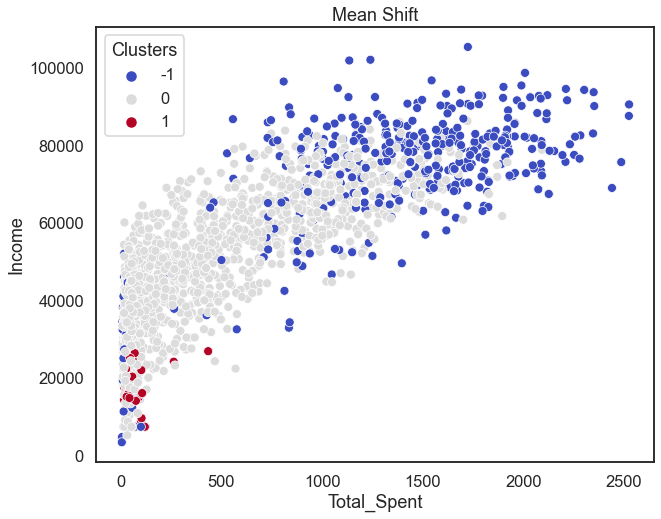

In [1580]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=original_data, x='Total_Spent', y='Income', hue='Clusters', palette='coolwarm')
plt.title('Mean Shift')

In [1584]:
# Cannot see a reasonable pattern to work with

### DBSCAN

In [1588]:
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.051742,0.464821,-1.976356,2.772685,-0.611331,-0.280312,-0.343230,0.114956,-1.067385,-0.570191,-1.640547,1.462697
1,-3.397967,-0.504556,0.017481,-0.137305,-1.561232,2.186123,-0.984990,0.481688,0.907649,-0.102591,0.912074,1.114466
2,3.120906,-0.841053,-1.026812,-1.109246,-1.057745,-0.075909,1.532664,0.826424,-0.359652,-1.108574,-0.106520,0.057527
3,-2.911717,-1.195201,-0.868312,-0.937380,-0.652858,0.839705,1.642229,0.751682,0.592288,-0.689756,0.781872,-1.551051
4,0.867036,1.271317,0.339259,-1.335957,0.815915,-1.181267,-1.095864,-0.300830,-0.282798,1.244229,0.219247,-1.556931
...,...,...,...,...,...,...,...,...,...,...,...,...
2104,2.558354,1.170267,-2.031961,-0.866730,1.182222,0.117801,-0.620265,0.477295,-0.170817,-0.062578,0.271417,0.100920
2105,-1.104124,3.636332,2.783798,-0.654493,-0.291780,1.632851,2.143330,-0.101721,1.265797,0.944792,1.842167,1.031419
2106,2.745946,-1.244159,-0.254175,0.171464,-1.085730,1.704647,-0.721121,-2.731748,-0.817084,0.428354,0.000031,-1.157111
2107,2.643127,1.292458,1.142044,-1.356022,-1.351969,-0.987560,1.134435,1.382930,0.441191,-1.081084,1.204509,-0.072706


In [1589]:
# PCA_df.drop(columns=['Clusters'], inplace=True)

In [1687]:
from sklearn.cluster import DBSCAN

In [1688]:
clustering = DBSCAN(eps=4, min_samples=9).fit(PCA_df)

In [1689]:
np.unique(clustering.labels_)

array([-1,  0,  1], dtype=int64)

In [1690]:
from mpl_toolkits.mplot3d import Axes3D

In [1691]:
PCA_df['Clusters'] =  DBSCAN(eps=4, min_samples=9).fit_predict(PCA_df)

In [1599]:
PCA_df['Clusters'].value_counts()

 0    2040
 1      50
-1      19
Name: Clusters, dtype: int64

In [1692]:
original_data['Clusters'] = DBSCAN(eps=4, min_samples=9).fit_predict(PCA_df)

Text(0.5, 1.0, 'DB Scan')

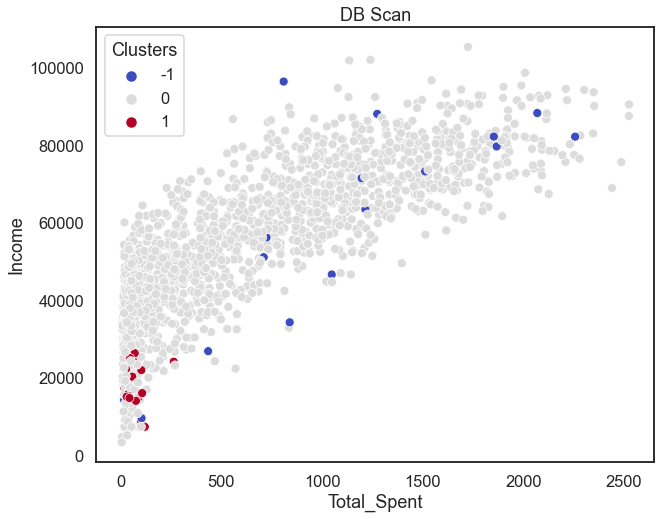

In [1693]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=original_data, x='Total_Spent', y='Income', hue='Clusters', palette='coolwarm')
plt.title('DB Scan')

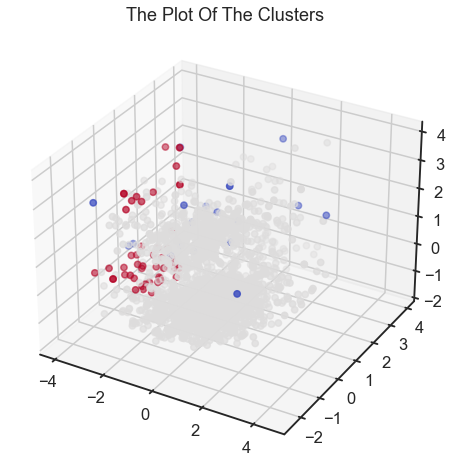

In [1600]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(PCA_df[5], PCA_df[9], PCA_df[6], s=40, c=PCA_df["Clusters"], marker='o', cmap='coolwarm')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [1601]:
PCA_df.drop(columns=['Clusters'], inplace=True)

In [1602]:
original_data.drop(columns='Clusters', inplace=True)

### Agglomerative Clustering

In [1603]:
original_data['Clusters'] = ag.fit_predict(PCA_df)

In [1606]:
original_data['Clusters'].value_counts()

0    842
1    764
2    503
Name: Clusters, dtype: int64

In [1607]:
original_data.shape

(2109, 36)

Text(0.5, 1.0, 'Distribution of Clusters Agg')

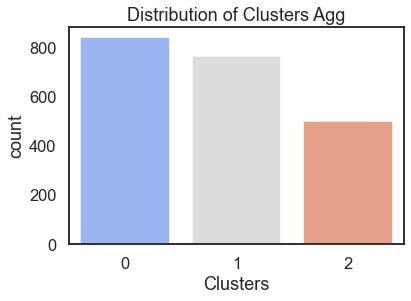

In [1608]:
sns.countplot(original_data['Clusters'], palette='coolwarm')
plt.title("Distribution of Clusters Agg")

Text(0.5, 1.0, 'Agglomerative')

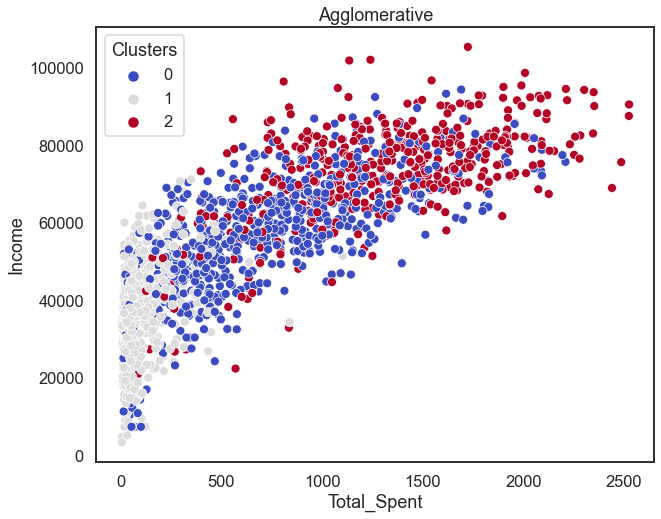

In [1609]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=original_data, x='Total_Spent', y='Income', hue='Clusters', palette='coolwarm')
plt.title('Agglomerative')

In [1610]:
data = original_data.copy()

In [1611]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Customer_days,Total_Spent,Total_Children,Is_Parent,Relationship,Age,Clusters
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,971,1617,0,0,Alone,64,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,125,27,2,1,Alone,67,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,472,776,0,0,Together,56,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3,11,0,65,53,1,1,Together,37,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,321,422,1,1,Married,40,0


### KMeans

Text(0.5, 1.0, 'Distribution of Clusters KMeans')

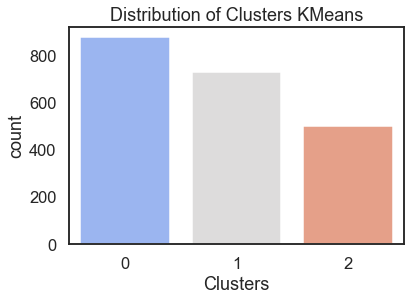

In [1621]:
data.drop(columns=['Clusters'], inplace=True)
data['Clusters'] = km.fit_predict(PCA_df)
data['Clusters'] = data['Clusters'].replace({2: 0, 0:2})
data['Clusters'] = data['Clusters'].replace({1: 0, 0:1})
sns.countplot(data['Clusters'], palette='coolwarm')
plt.title("Distribution of Clusters KMeans")

In [1622]:
data['Clusters'].value_counts()

0    877
1    730
2    502
Name: Clusters, dtype: int64

Text(0.5, 1.0, 'KMeans')

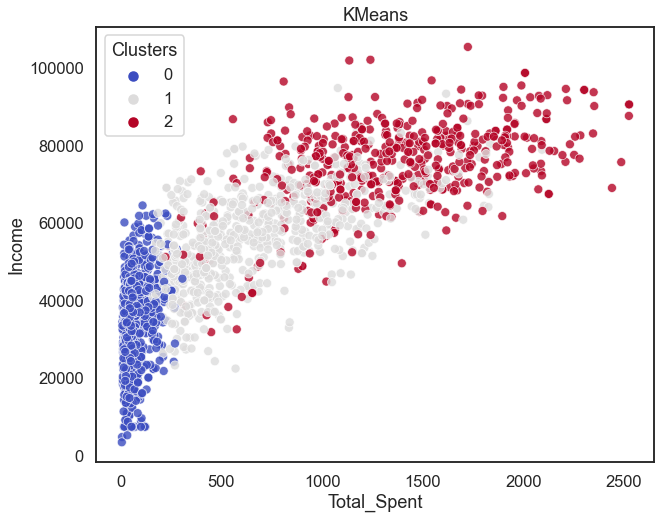

In [1624]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Total_Spent', y='Income', hue='Clusters', palette='coolwarm', alpha=0.8)
plt.title('KMeans')

In [1625]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Customer_days,Total_Spent,Total_Children,Is_Parent,Relationship,Age,Clusters
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,971,1617,0,0,Alone,64,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,125,27,2,1,Alone,67,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,472,776,0,0,Together,56,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3,11,0,65,53,1,1,Together,37,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,321,422,1,1,Married,40,1


Due this being unsupervised learning, cannot evaluate our clustering model and therefore, we will explore the the nature of clusters formed relative to the data

Text(0.5, 1.0, 'Distribution of Clusters')

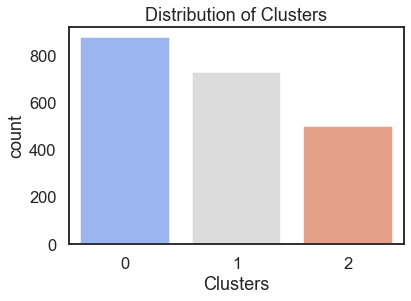

In [1626]:
sns.countplot(data['Clusters'], palette='coolwarm')
plt.title("Distribution of Clusters")

Around the same

### Customer Profiling and evalutating clusters

In [1627]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_days', 'Total_Spent', 'Total_Children', 'Is_Parent',
       'Relationship', 'Age', 'Clusters'],
      dtype='object')

In [1628]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Customer_days,Total_Spent,Total_Children,Is_Parent,Relationship,Age,Clusters
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,971,1617,0,0,Alone,64,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,125,27,2,1,Alone,67,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,472,776,0,0,Together,56,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3,11,0,65,53,1,1,Together,37,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,321,422,1,1,Married,40,1


<AxesSubplot:xlabel='Total_Spent', ylabel='Income'>

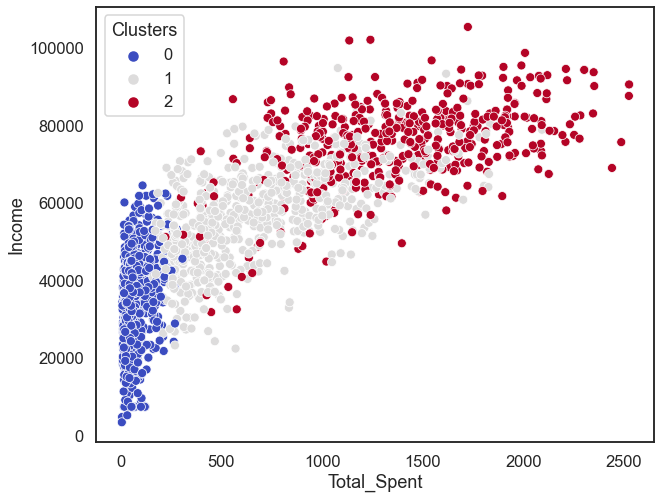

In [1629]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Total_Spent', y='Income', hue='Clusters', palette='coolwarm')

The KMeans algorithm seems to divide these better and hence we will use that

To categorize, we see \
Group 0: Average Income, Average Spending \
Group 1: Lower Incomes, Low Spending \
Group 2: High Incomes, High Spending 

There are exceptions where we can see people with high income and low spending or average to low spending but high incomes but these do not form the majority of points

<AxesSubplot:xlabel='Clusters', ylabel='Total_Spent'>

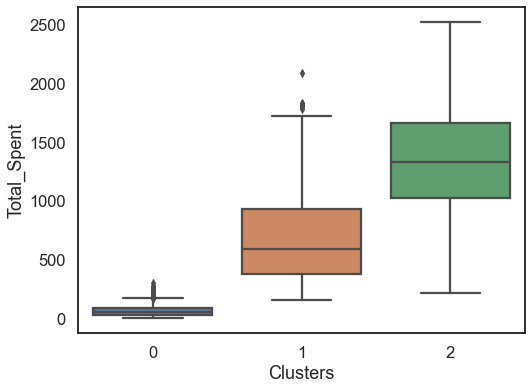

In [1630]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='Clusters', y='Total_Spent')

The boxplot above confirms are categorization where we can see 3 distinct groups and Group 2 is the biggest set of customers for the grocery store followed by 0

In [1694]:
data[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
     
         "Clusters", 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']].groupby(by='Clusters').mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Clusters,,,,,,,,,,
0,29.925884,3.891676,16.567845,5.484607,4.010262,12.222349,1.851767,0.417332,3.023945,6.454960
1,406.463014,25.213699,138.490411,33.239726,25.790411,57.952055,6.031507,2.972603,7.326027,5.764384
2,605.515936,63.918327,449.316733,96.852590,64.388446,74.599602,4.982072,5.764940,8.322709,2.695219


Cluster 0 - spends most on Wines and Meat Products (High web and instore purchases, focuses on deals the most) \
Cluster 1 - focuses its spending on Wines, Meat, Sweet and Gold Products (High web visits yet higher instore purchases) \
Cluster 2 - spends on mostly Wines, Meat, Sweet & Fish (Large instore purchases as well as good number of web and catalog)

In [1632]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_days', 'Total_Spent', 'Total_Children', 'Is_Parent',
       'Relationship', 'Age', 'Clusters'],
      dtype='object')

In [1633]:
# Total promos accepted
data["Total_promos_accepted"] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + \
                                \
                                data['AcceptedCmp5']

In [1634]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_days,Total_Spent,Total_Children,Is_Parent,Relationship,Age,Clusters,Total_promos_accepted
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,11,1,971,1617,0,0,Alone,64,2,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,11,0,125,27,2,1,Alone,67,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,472,776,0,0,Together,56,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,11,0,65,53,1,1,Together,37,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,321,422,1,1,Married,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,11,0,541,1341,1,1,Married,54,1,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,11,0,61,444,3,1,Together,75,1,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,11,0,315,1241,0,0,Alone,40,2,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,11,0,316,843,1,1,Together,65,1,0


<AxesSubplot:xlabel='Total_promos_accepted', ylabel='count'>

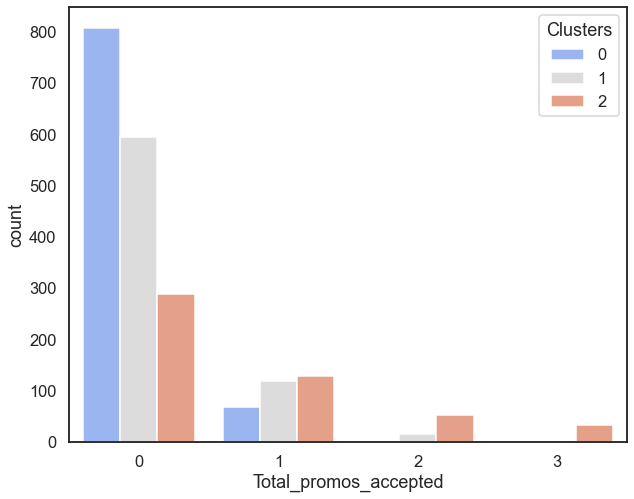

In [1635]:
plt.figure(figsize=(10,8))
sns.countplot(x=data["Total_promos_accepted"], hue=data["Clusters"], palette='coolwarm')

Cluster 2 has purchased and accepted the most offers from campaigns, next is Cluster 0 and the last is Cluster 1 \
No person has accepted all 5 promo campaign offers or even 4 thus, better targeted and planned campaigns are required to boost sales

<AxesSubplot:xlabel='Clusters', ylabel='Customer_days'>

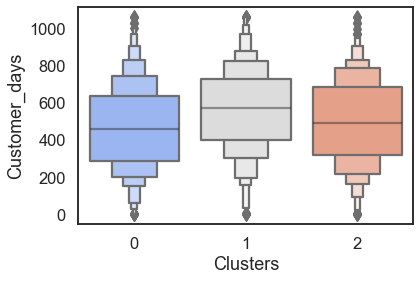

In [1636]:
sns.boxenplot(y=data["Customer_days"], x=data["Clusters"], palette='coolwarm')

Cluster 1 seems to have the oldest customers (of average income - more loyal)

<AxesSubplot:xlabel='Clusters', ylabel='NumDealsPurchases'>

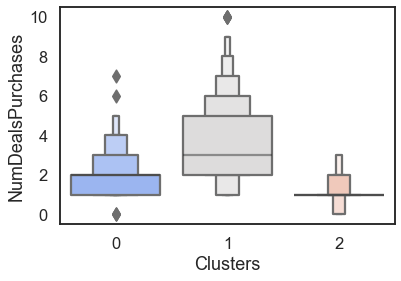

In [1637]:
sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette='coolwarm')

Best outcome for Cluster 1 who accepted several deal purchases unlike campaign offers which did not do well. Cluster 0 customers seem not too much into deals and Cluster 2 appear to have almost no interest in them which probably due to their high income and affluent background

**Cluster Profiling**

We will try to understand what type of person our main/star customer such as personal traits and thus can be used for enhanced targeting

In [1638]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_days', 'Total_Spent', 'Total_Children', 'Is_Parent',
       'Relationship', 'Age', 'Clusters', 'Total_promos_accepted'],
      dtype='object')

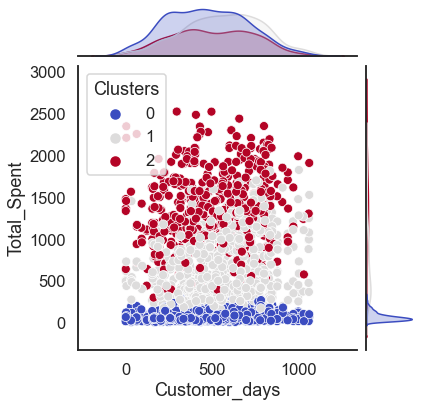

In [1639]:
sns.jointplot(x='Customer_days', y='Total_Spent', data=data, hue='Clusters', palette='coolwarm')

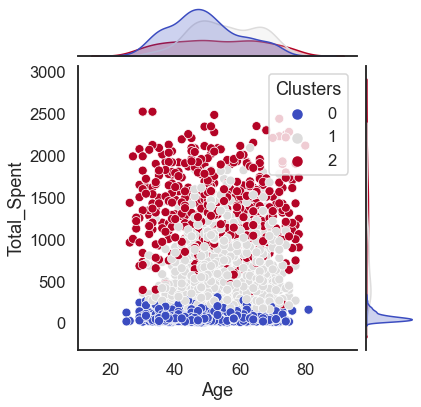

In [1640]:
sns.jointplot(x='Age', y='Total_Spent', data=data, hue='Clusters', palette='coolwarm')

In [1641]:
data['Relationship'] = data['Marital_Status'].replace({'Divorced': 'Alone', 'Widow': 'Alone', 'Single': 'Alone', 'Absurd': 
                                                    'Alone', 'YOLO': 'Alone'})
data['Relationship'].value_counts()

Married     822
Alone       749
Together    538
Name: Relationship, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

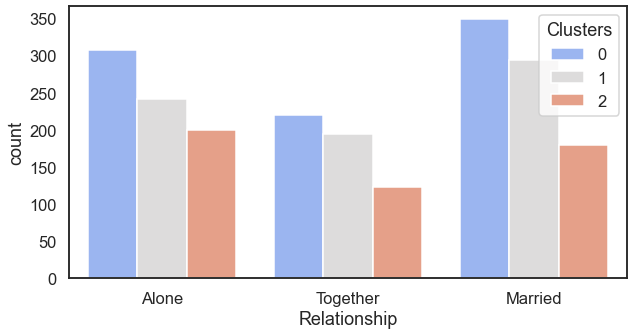

In [1642]:
plt.figure(figsize=(10,5))
sns.countplot(x='Relationship',  data=data, hue='Clusters', palette='coolwarm')
plt.tight_layout

<AxesSubplot:xlabel='Is_Parent', ylabel='count'>

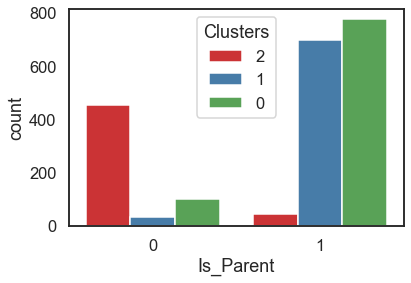

In [1644]:
sns.countplot(x='Is_Parent',  data=data, hue='Clusters', palette='Set1', hue_order=[2,1,0])

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

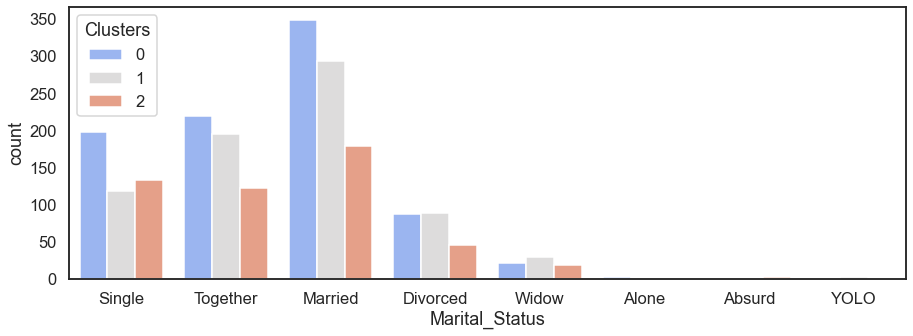

In [1645]:
plt.figure(figsize=(15,5))
sns.countplot(x='Marital_Status',  data=data, hue='Clusters', palette='coolwarm')
plt.tight_layout

<AxesSubplot:xlabel='Total_Children', ylabel='count'>

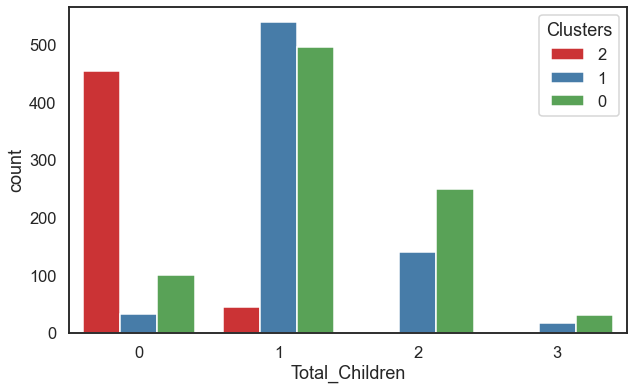

In [1646]:
plt.figure(figsize=(10,6))
sns.countplot(x='Total_Children',  data=data, hue='Clusters', palette='Set1', hue_order=[2,1,0])

<AxesSubplot:xlabel='Kidhome', ylabel='count'>

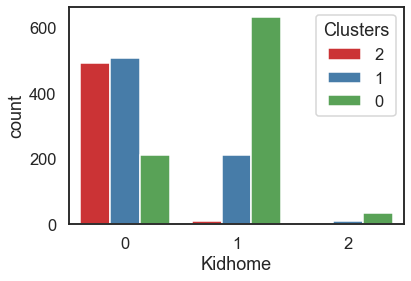

In [1647]:
sns.countplot(x='Kidhome',  data=data, hue='Clusters', palette='Set1', hue_order=[2,1,0])

<AxesSubplot:xlabel='Teenhome', ylabel='count'>

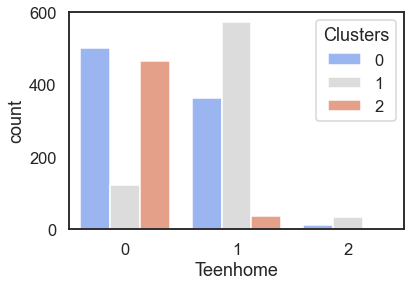

In [1648]:
sns.countplot(x='Teenhome', data=data, hue='Clusters', palette='coolwarm')

<AxesSubplot:xlabel='Education', ylabel='count'>

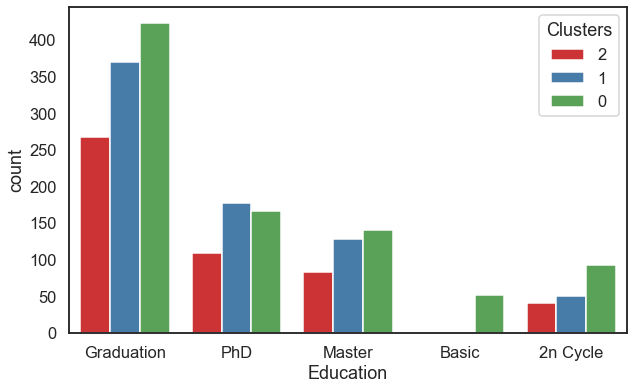

In [1649]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education',  data=data, hue='Clusters', palette='Set1',  hue_order=[2,1,0])